In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
np.random.seed(42)

n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)
datasets = [noisy_circles, noisy_moons, blobs]

In [3]:
def plot_datasets(datasets):
    
    plt.figure(figsize=(16, 10))

    plot_num = 1
    for i, dataset in enumerate(datasets):
        X, y = dataset
        plt.subplot(len(noisy_circles), len(datasets), i+1)
        plt.scatter(X[:, 0], X[:, 1], c=y)

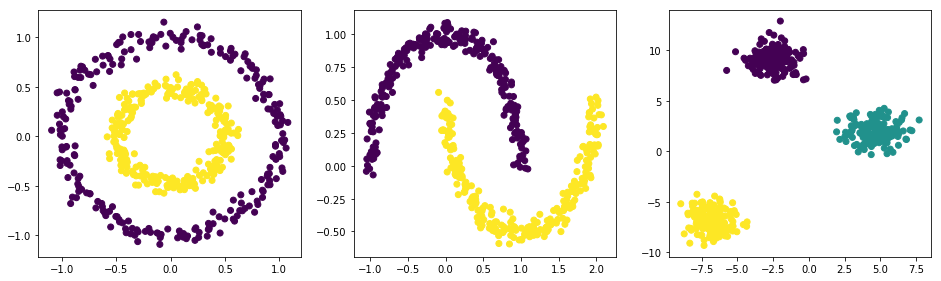

In [4]:
plot_datasets(datasets)

In [5]:
# Wikipedia has a clear pseudocode explanation for the algorithm.
# https://en.wikipedia.org/wiki/DBSCAN

class DBSCAN:
    
    def __init__(self, eps=0.5, min_samples=5):
        
        self.eps = eps
        self.min_samples = min_samples
        
    
    def fit(self, X):
        C = 0
        n_points = len(X)
        self.labels_ = np.zeros(n_points)
        
        for idx in range(n_points):

            if self.labels_[idx] != 0:
                continue
            
            neighbours = self.range_query(X, idx)
            if len(neighbours) < self.min_samples:
                self.labels_[idx] = -1
                continue
            
            C += 1
            self.labels_[idx] = C
            
            i = 0
            while i < len(neighbours):
                
                neighbour_idx = int(neighbours[i])
                
                if self.labels_[neighbour_idx] == -1:
                    self.labels_[neighbour_idx] = C
                
                elif self.labels_[neighbour_idx] == 0:                    
                    self.labels_[neighbour_idx] = C
                    new_neighbours = self.range_query(X, neighbour_idx)
                    
                    if len(new_neighbours) >= self.min_samples:
                        neighbours = np.append(neighbours, new_neighbours)
                
                i += 1
                
    def range_query(self, X, idx):
        
        neighbours = np.where(np.linalg.norm(X[idx] - X, axis=1) < self.eps)[0]
        return neighbours    

In [6]:
new_datasets = []

for dataset in datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.1, min_samples=5)
    db.fit(X)
    labels = db.labels_
    new_datasets.append((X, labels))

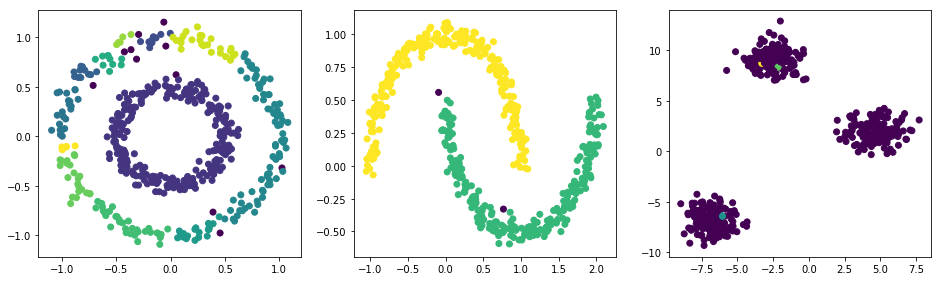

In [7]:
plot_datasets(new_datasets)

In [8]:
# Sklearn way
from sklearn.cluster import DBSCAN

new_datasets = []

for dataset in datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.1, min_samples=5)
    db.fit(X)
    labels = db.labels_
    new_datasets.append((X, labels))

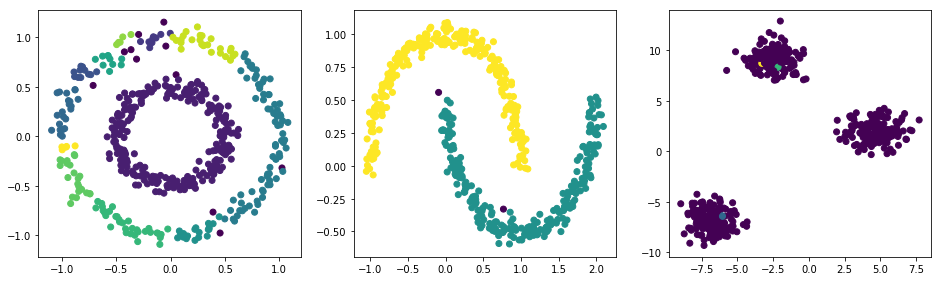

In [9]:
plot_datasets(new_datasets)